**1. How would you incorporate other vectorizations than tf-idf into your proposed document similarity measure (Question 3 of Week 2)?**

https://github.com/malteos/awesome-document-similarity

Dimensions of similarity: lexical, structural, and semantic document similarity.

•	Traditional Text-based: Bag-of-Words, VSM, TF-IDF

•	World-level: Word2Vec, Glove, FastText

•	Word Context: CoVe, ELMo, Zalando Flair

•	From word to sentence level: Average, Weighted Average, Smooth Inverse Frequency

•	Sentence-level: Skip-thoughts, Quick-Thoughts, Universal Sentence Encoder, InferSent, ERCNN, DeCLUTR

•	Transformer Language Models: BERT, GPT, GPT-2, ULMMFiT, Transformer-XL, Sentence Transformers

•	Document level: Doc2Vec, Fuzzy Bag-of-Worlds Model for Document Representation

•	Topic oriented: LSA/LSI, LDA, LDA2Vec

Similarity / Distance measures:

Euclidean distance, Jaccard similarity, Jensen-Shannon distance, cosine similarity, soft cosine, Manhatten distance, edit distance, Levenshtein distance, Word mover distance, S-WMD.



**2. How could one make use these other vectorizations to improve sentiment analysis by considering longer sequences within the text just than single words?**

https://srinivas-yeeda.medium.com/sentiment-analysis-using-word2vec-and-glove-embeddings-5ad7d50ddb0d

Word embedding est une technique de modélisation du langage pour représenter les mots ou les phrases sous forme de vecteurs. Word embedding apprend la relation entre les mots pour construire une représentation. Diverses méthodes : matrice de cooccurrence, modélisation probabiliste et les réseaux de neurones. 2 types de word embedding :

•	Basé sur la fréquence : vecteur de comptage, vecteur de cooccurrence, HashingVectorizer, TD-IDF

•	Mots préformé   Word2Vec, GloVe, Bert, FastText

Word2Vec apprend en fonction du contexte et de la cooccurrence des mots. Les relations sémantiques et syntaxiques sont maintenues dans les vecteurs. Deux variations : CBOW & Skipgram. Le modèle CBOW devine le mot suivant avec le contexte des mots. Le modèle skipgram tente de réaliser l’inverse du CBOW. Il prend le mot cible en entrée et essaie d’obtenir les mots de contexte. Glove embedding est basé sur la cooccurrence globale des mots dans le corpus.

Exemples donnés dans le texte pour word2vec and GloVe.

Autres exemples :
https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91

•	Supprimer les URL, ponctuation, lowercase, stopwords, stemming / lemmatizing.

•	Transformer le texte en vecteur, LSTM, bidirectional layers.



**3. Would text prediction (like the auto-completion of Question 2 of Week 6) be easier in some way if these other vectorizations are taken into consideration? How and why?**

https://www.educative.io/answers/how-to-predict-a-word-using-word2vec-model
https://jalammar.github.io/illustrated-word2vec/
https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

La prédiction d’un texte peut être fait en convertissant du texte en valeurs numériques et en entraînant un modèle après avoir alimenté ces valeurs. La technique Word Embedding est utilisé pour convertir des mots en vecteur numérique. Word2Vec va donner aux mots un contexte approprié avec des signification sémantiques similaires. 2 méthodologies :

•	CBOW : utilise le contexte pour deviner le mot cible. 

•	Skip-gram model : prédit le contexte des mots cibles. 


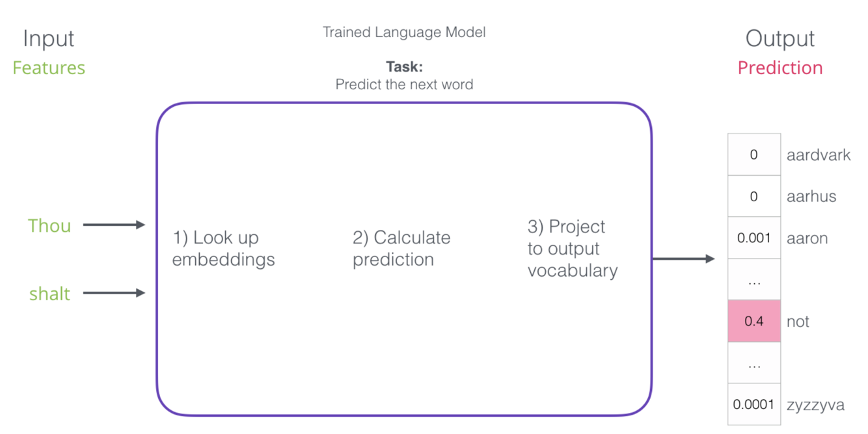

Formation du modèle de langage :

Les mots obtiennent leurs incorporations en regardant à côté de quels autres mots ils ont tendance à apparaître. 

•	Obtenir beaucoup de données textuelles (ex : Wikipédia)

•	Prendre une fenêtre (ex : 3 mots) que nous glissons sur tout ce texte.

•	La fenêtre coulissante génère des échantillons d’apprentissage pour notre modèle.

Lorsque nous avons notre modèle selon nos données de formation, utilisation d’un modèle de langage neuronal pour prédire le mot voisin.

https://towardsdatascience.com/what-does-word2vec-actually-learn-489f3f950388

Word2Vec est simple et intuitif. Il indique que les mots qui apparaissent fréquemment proches les ins des autres ont une représentation vectorielle similaire. Word2Vec est essentiellement équivalent à la factorisation matricielle des scores PMI entre les paires de mots. 



**4. Compute and compare (k-means or other) clusterings (for a corpus of your choice) based on our three vectorizations — tf-idf, PPMI, and skipgram embeddings — in terms of some consistency measure such as the Rand or the Jaccard index. Discuss the differences you observe. Does the spacial grouping, in any of the three cases, appear to capture some sort of perceivable semantic similarity?**

In [12]:
install.packages("janeaustenr") # a new package to access a particular author's works in the Gutenberg repository
install.packages("tidytext") # in colab, we need to reinstall for each new runtime (on your own machine, install only once)
install.packages("stopwords")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(janeaustenr) 
library(tidytext)
library(stopwords)
library(stringr) # as should this
library(SnowballC)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
book_words <- austen_books() %>%
  filter(book == "Persuasion") %>% 
  mutate(linenumber = row_number(), chapter = cumsum(str_detect(text, regex("^Chapter [:digit:]", ignore_case = TRUE))))
tail(book_words,10)

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
affection. His profession was all that could ever make her friends,Persuasion,8319,24
"wish that tenderness less, the dread of a future war all that could dim",Persuasion,8320,24
"her sunshine. She gloried in being a sailor's wife, but she must pay",Persuasion,8321,24
"the tax of quick alarm for belonging to that profession which is, if",Persuasion,8322,24
"possible, more distinguished in its domestic virtues than in its",Persuasion,8323,24
national importance.,Persuasion,8324,24
,Persuasion,8325,24
,Persuasion,8326,24
,Persuasion,8327,24


In [3]:
install.packages("quanteda")
library(quanteda)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fastmatch’, ‘RcppParallel’, ‘RcppArmadillo’


Package version: 3.2.3
Unicode version: 10.0
ICU version: 60.2

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.



TF-IDF:

In [14]:
bw <- book_words %>%
  unnest_tokens(word, text) %>%
  anti_join(get_stopwords(), by = "word") %>%
  mutate(stem = wordStem(word)) %>%
  count(chapter, stem) %>%
  bind_tf_idf(stem, chapter, n) #%>%
  #cast_dfm(chapter, stem, tf_idf)
head(bw)

chapter,stem,n,tf,idf,tf_idf
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
0,1818,1,0.2500000000,3.218876,0.804718956
0,austen,1,0.2500000000,3.218876,0.804718956
0,jane,1,0.2500000000,3.218876,0.804718956
0,persuas,1,0.2500000000,1.609438,0.402359478
1,1,3,0.0023942538,3.218876,0.007706806
1,15,1,0.0007980846,2.525729,0.002015745


In [6]:
tfidf <- bw %>% 
  filter(n > 15) %>% # keep any stem that repeats 
  cast_dfm(chapter, stem, tf_idf)
dim(tfidf)

[1] 22 46

In [5]:
install.packages("proxy") # https://cran.r-project.org/web/packages/proxy/proxy.pdf
require(proxy) # for a dist that includes cosine similarity

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: proxy


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




In [6]:
install.packages("qlcMatrix")
library(qlcMatrix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘slam’, ‘sparsesvd’, ‘docopt’


Loading required package: Matrix

Loading required package: slam

Loading required package: sparsesvd



In [9]:
aux <- as.matrix(tfidf)
dim(aux)
st <- simil(t(aux), method = "cosine") # if we do not transpose, we get a document-document similarity, which is also kind of cool

[1] 22 46

In [4]:
install.packages("plot.matrix")
library(plot.matrix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



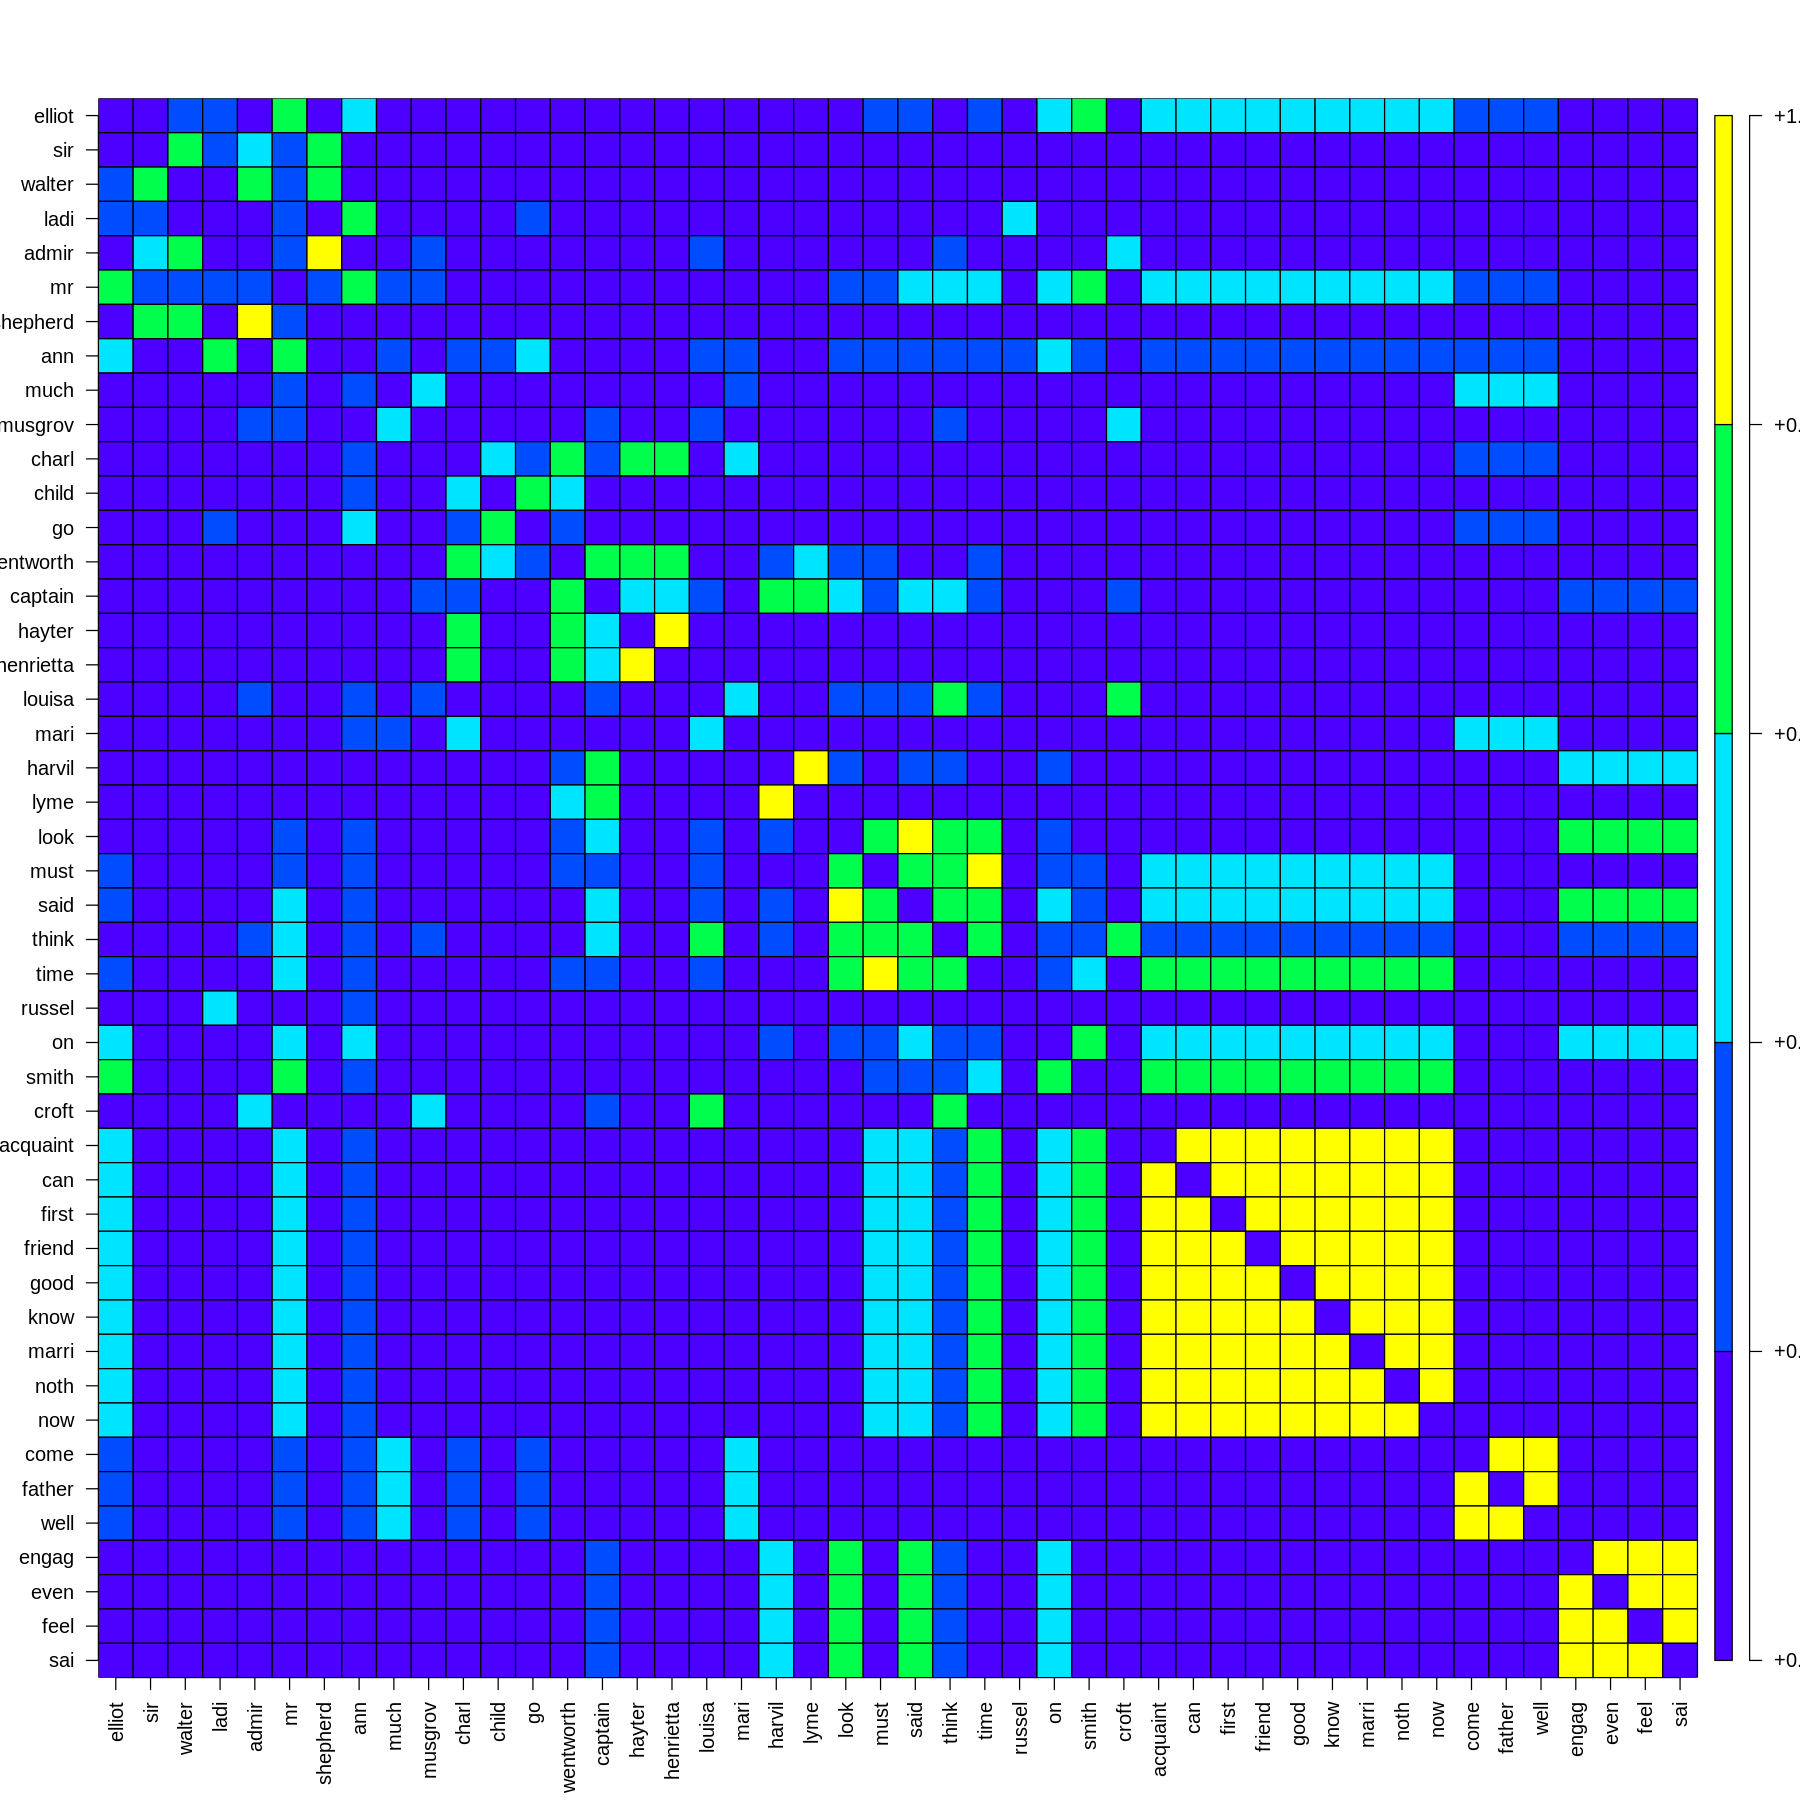

In [11]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(las = 2)
plot(as.matrix(st), col = topo.colors, xlab="", ylab="", main="") 

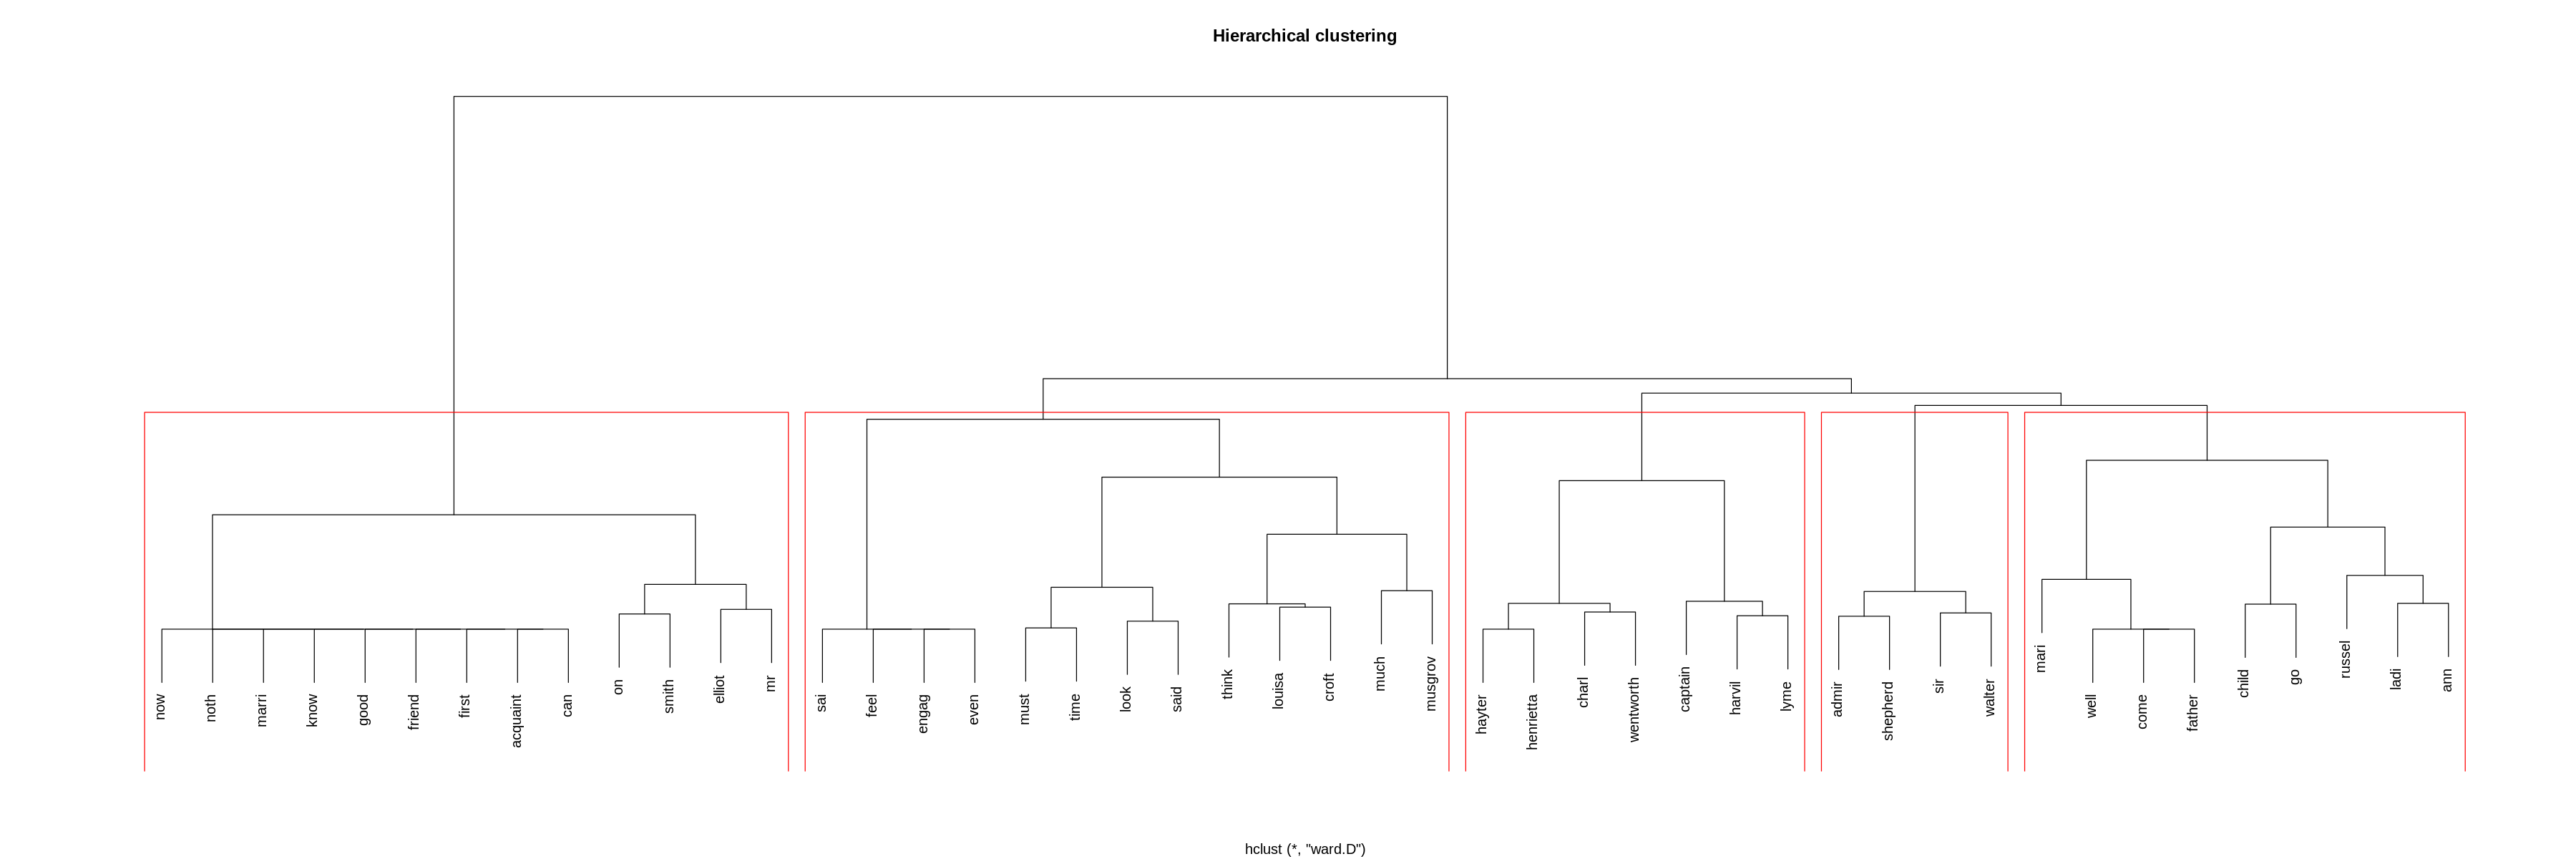

In [12]:
# https://cran.r-project.org/web/packages/textmineR/vignettes/b_document_clustering.html
#cdist <- as.dist(1 - st)
cdist <- as.dist(st)

options(repr.plot.width = 30, repr.plot.height = 10) # a wider, shorter figure
hc <- hclust(cdist, "ward.D")

clustering <- cutree(hc, 5)

plot(hc, main = "Hierarchical clustering",
     ylab = "", xlab = "", yaxt = "n")

rect.hclust(hc, 5, border = "red")

In [8]:
install.packages("NbClust") # https://rdrr.io/cran/NbClust/
install.packages("factoextra") # https://www.rdocumentation.org/packages/factoextra/versions/1.0.7

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [9]:
library(NbClust)
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



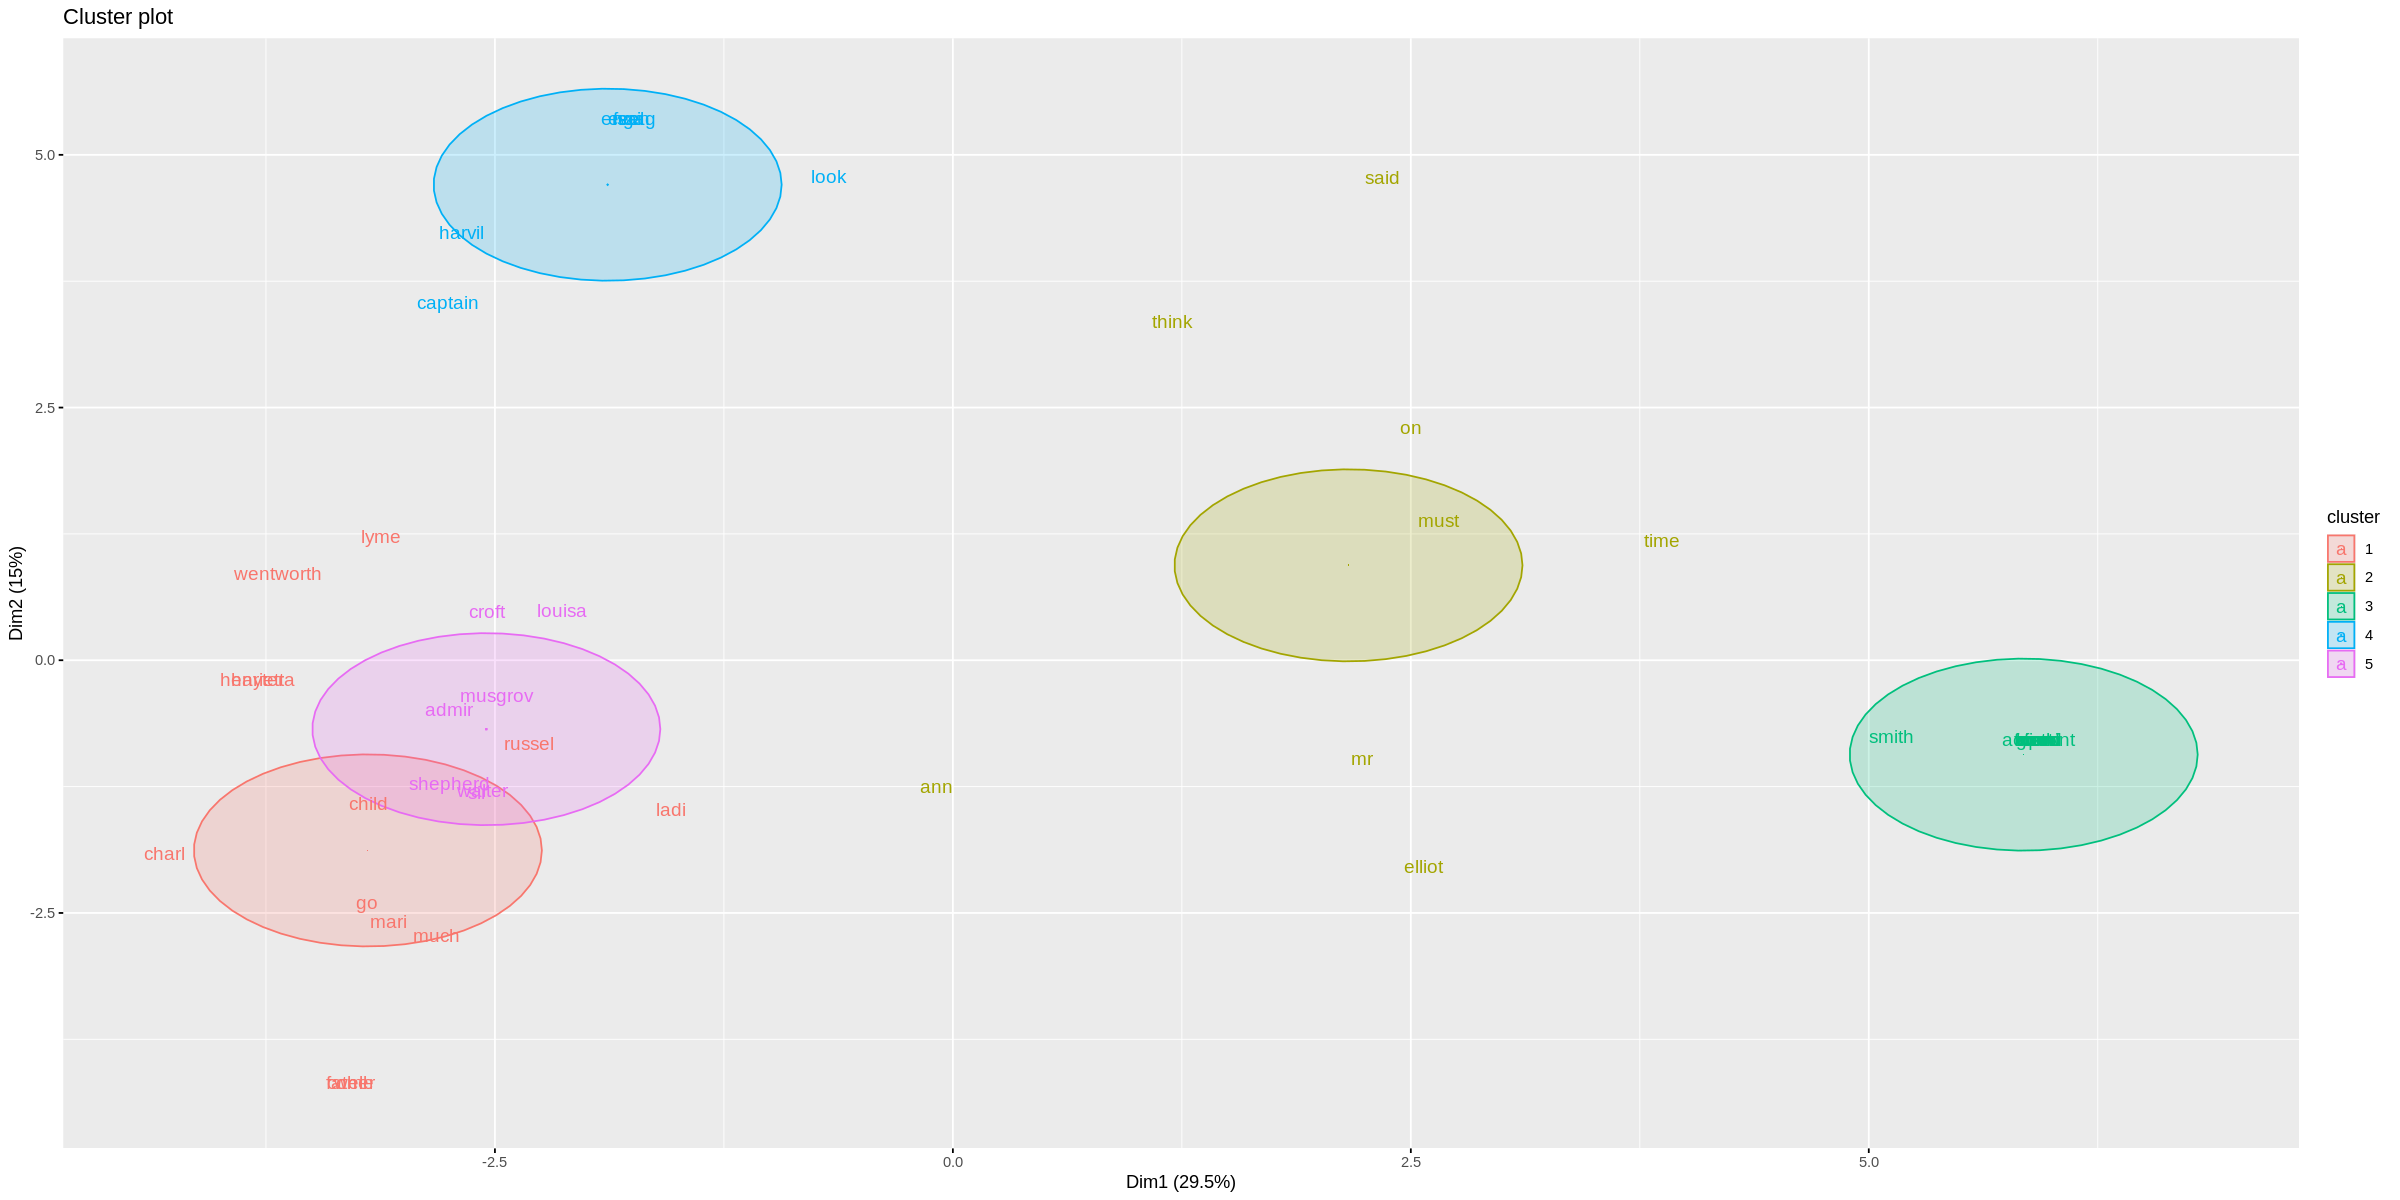

In [15]:
options(repr.plot.width = 20, repr.plot.height = 10) # a wider, shorter figure
nbc = kmeans(st, 5)
fviz_cluster(nbc, data = st, geom = c("text"), ellipse.type = "euclid")

TF-IDF & cosine similarity:

J’ai effectué le même exemple que dans le cours en supprimant les stopword et appliquant le stemming. Pour un même livre, j’ai séparé par chapitre. Ainsi le TF-IDF nous aidera à comprendre quel type de de document/chapitre nous avons. Note : j’ai filtré sur le nombre de mot > 15.

a.	Matrice: 5 classes. Ex: mots can, first, friend, good in same cluster.

b.	Dendrogramme avec la mesure ward.D: 5 cluster. Les mots can, first, friend, good dans le même cluster également.

c.	KMean with euclidean : Plus difficile à voir puisque certains mots sont interposés. 5 clusters. Certains mots sont dans le même cluster comme ann et elliot alors que dans la matrice et le dendrogramme ils sont classé séparément.


PMI: Understand word embeddings by finding them yourself. https://smltar.com/embeddings.html

In [10]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.5
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::none()   masks qlcMatrix::none()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



In [15]:
# Word embeddings are a way to represent text data as vectors of numbers based on a huge corpus of text, capturing semantic meaning from words’ context.
# We can determine these vectors for a corpus of text using word counts and matrix factorization.
# First, let’s filter out words that are used only rarely in this data set and create a nested dataframe, with one row per chapter.

tidy_chapter <- book_words %>%
  select(chapter, text) %>%
  unnest_tokens(word, text) %>%
  add_count(word) %>%
  filter(n >= 50) %>%
  select(-n)

nested_words <- tidy_chapter %>%
  nest(words = c(word))

In [16]:
# Next, let’s create a slide_windows() function, using the slide() function
# Our new function identifies skipgram windows in order to calculate the skipgram probabilities, how often we find each word near each other word. 
# We do this by defining a fixed-size moving window that centers around each word. 

# One of the arguments to this function is the window_size, which determines the size of the sliding window that moves through the text, counting up words that we find within the window. 
# The best choice for this window size depends on your analytical question because it determines what kind of semantic meaning the embeddings capture. 
# A smaller window size, like three or four, focuses on how the word is used and learns what other words are functionally similar. 
# A larger window size, like 10, captures more information about the domain or topic of each word, not constrained by how functionally similar the words are.

slide_windows <- function(tbl, window_size) {
  skipgrams <- slider::slide(
    tbl, 
    ~.x, 
    .after = window_size - 1, 
    .step = 1, 
    .complete = TRUE
  )
  
  safe_mutate <- safely(mutate)
  
  out <- map2(skipgrams,
              1:length(skipgrams),
              ~ safe_mutate(.x, window_id = .y))
  
  out %>%
    transpose() %>%
    pluck("result") %>%
    compact() %>%
    bind_rows()
}

In [17]:
install.packages("widyr")
install.packages("furrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’




In [18]:
install.packages("slider")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘warp’




In [19]:
library(widyr)
library(furrr)

# Now that we can find all the skipgram windows, we can calculate how often words occur on their own, and how often words occur together with other words. 
# We do this using the point-wise mutual information (PMI), a measure of association that measures exactly what we described in the previous sentence.
# We use PMI to measure which words occur together more often than expected based on how often they occurred on their own.

plan(multisession)  ## for parallel processing

tidy_pmi <- nested_words %>%
  mutate(words = future_map(words, slide_windows, 4L)) %>%
  unnest(words) %>%
  unite(window_id, chapter, window_id) %>%
  pairwise_pmi(word, window_id)

#tidy_pmi

Loading required package: future



In [22]:
head(tidy_pmi)

item1,item2,pmi
<chr>,<chr>,<dbl>
walter,sir,4.22490149
elliot,sir,1.04753222
of,sir,-0.08345933
kellynch,sir,0.02276638
in,sir,-0.86641817
was,sir,-0.27961872


In [20]:
install.packages("irlba")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
# We can next determine the word vectors from the PMI values using singular value decomposition (SVD). 
# SVD is a method for dimensionality reduction via matrix factorization that works by taking our data and decomposing it onto special orthogonal axes. 
# The first axis is chosen to capture as much of the variance as possible. 
# Keeping that first axis fixed, the remaining orthogonal axes are rotated to maximize the variance in the second. This is repeated for all the remaining axes.

#Creating 100-dimensional word embeddings.

tidy_word_vectors <- tidy_pmi %>%
  widely_svd(
    item1, item2, pmi,
    nv = 100, maxit = 1000
  )

# Now that we have determined word embeddings for the data set of book chapter
head(tidy_word_vectors)

item1,dimension,value
<chr>,<int>,<dbl>
walter,1,0.06597717
elliot,1,0.09969988
of,1,0.09270853
kellynch,1,0.04870950
in,1,0.08663368
was,1,0.11144090


In [22]:
# Which words are close to each other in this new feature space of word embeddings? 
# Let’s create a simple function that will find the nearest words to any given example in using our newly created word embeddings.

# This function takes the tidy word embeddings as input, along with a word (or token, more strictly) as a string. 
# It uses matrix multiplication and sums to calculate the cosine similarity between the word and all the words in the embedding to find which words are closer or farther to the input word, 
# and returns a dataframe sorted by similarity.

nearest_neighbors <- function(df, token) {
  df %>%
    widely(
      ~ {
        y <- .[rep(token, nrow(.)), ]
        res <- rowSums(. * y) / 
          (sqrt(rowSums(. ^ 2)) * sqrt(sum(.[token, ] ^ 2)))
        
        matrix(res, ncol = 1, dimnames = list(x = names(res)))
      },
      sort = TRUE
    )(item1, dimension, value) %>%
    select(-item2)
}

In [34]:
# What words are closest to "friend" in the data set of book chapter, as determined by our word embeddings?

head(tidy_word_vectors %>%
  nearest_neighbors("friend"),5)

item1,value
<chr>,<dbl>
friend,1.0000000
father,0.2717789
sister,0.2709099
feelings,0.2184343
dear,0.2078275


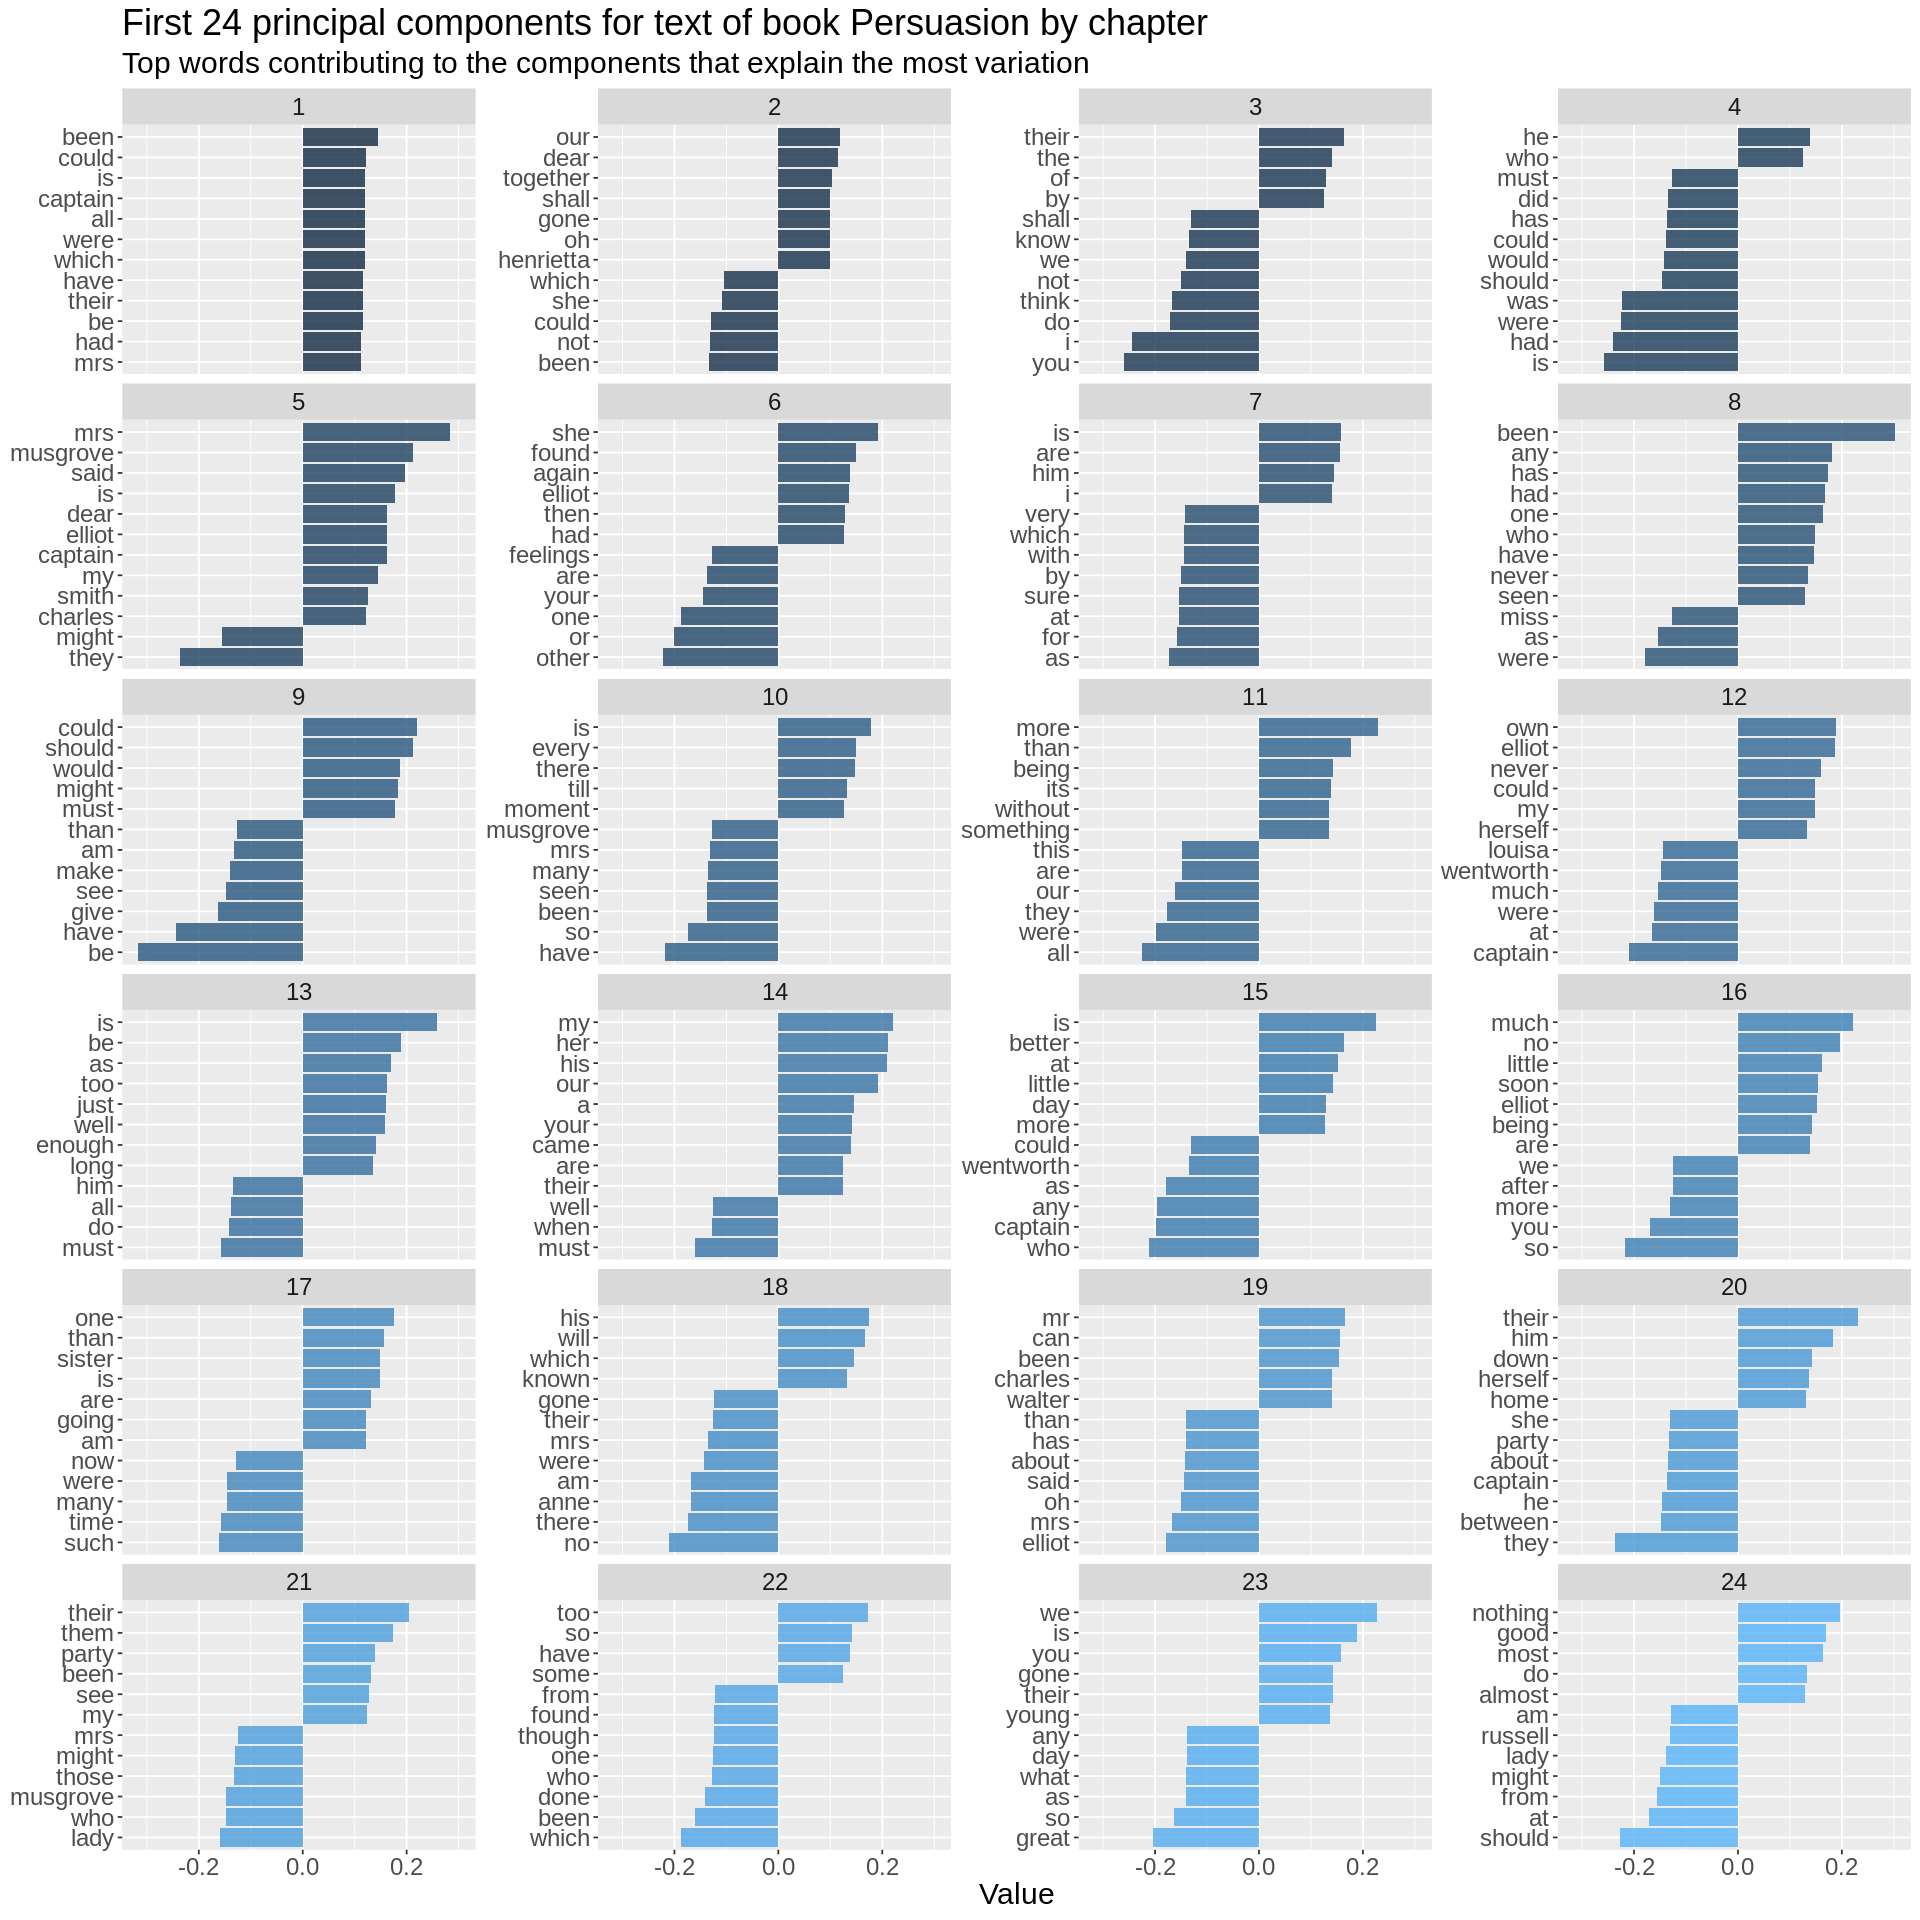

In [35]:
# Since we have found word embeddings via singular value decomposition, we can use these vectors to understand what principal components explain the most variation in the book chapter. 
# The orthogonal axes that SVD used to represent our data were chosen so that the first axis accounts for the most variance, the second axis accounts for the next most variance, and so on. 
# We can now explore which and how much each original dimension (tokens in this case) contributed to each of the resulting principal components produced using SVD.

options(repr.plot.width = 16, repr.plot.height = 16) # a wider, shorter figure
tidy_word_vectors %>%
  filter(dimension <= 24) %>%
  group_by(dimension) %>%
  top_n(12, abs(value)) %>%
  ungroup() %>%
  mutate(item1 = reorder_within(item1, value, dimension)) %>%
  ggplot(aes(item1, value, fill = dimension)) +
  geom_col(alpha = 0.8, show.legend = FALSE) +
  facet_wrap(~dimension, scales = "free_y", ncol = 4) +
  scale_x_reordered() +
  coord_flip() +
  labs(
    x = NULL,
    y = "Value",
    title = "First 24 principal components for text of book Persuasion by chapter",
    subtitle = paste("Top words contributing to the components that explain",
                     "the most variation")
  )+ 
  theme(text = element_text(size = 18))

In [23]:
# We created word embeddings and can explore them to understand our text data set, but how do we use this vector representation in modeling? 
# The classic and simplest approach is to treat each document as a collection of words and summarize the word embeddings into document embeddings, either using a mean or sum. 
# This approach loses information about word order but is straightforward to implement. 

word_matrix <- tidy_chapter %>%
  count(chapter, word) %>%
  cast_sparse(chapter, word, n)

embedding_matrix <- tidy_word_vectors %>%
  cast_sparse(item1, dimension, value)

doc_matrix <- word_matrix %*% embedding_matrix

dim(doc_matrix)

[1]  25 100

In [24]:
embedding_matrix <- tidy_word_vectors %>%
  #filter(value > 0.15) %>%  not make sense on vector
  cast_sparse(item1, dimension, value)

dim(embedding_matrix)

[1] 227 100

In [25]:
cos_emb <- cosSparse(t(embedding_matrix))

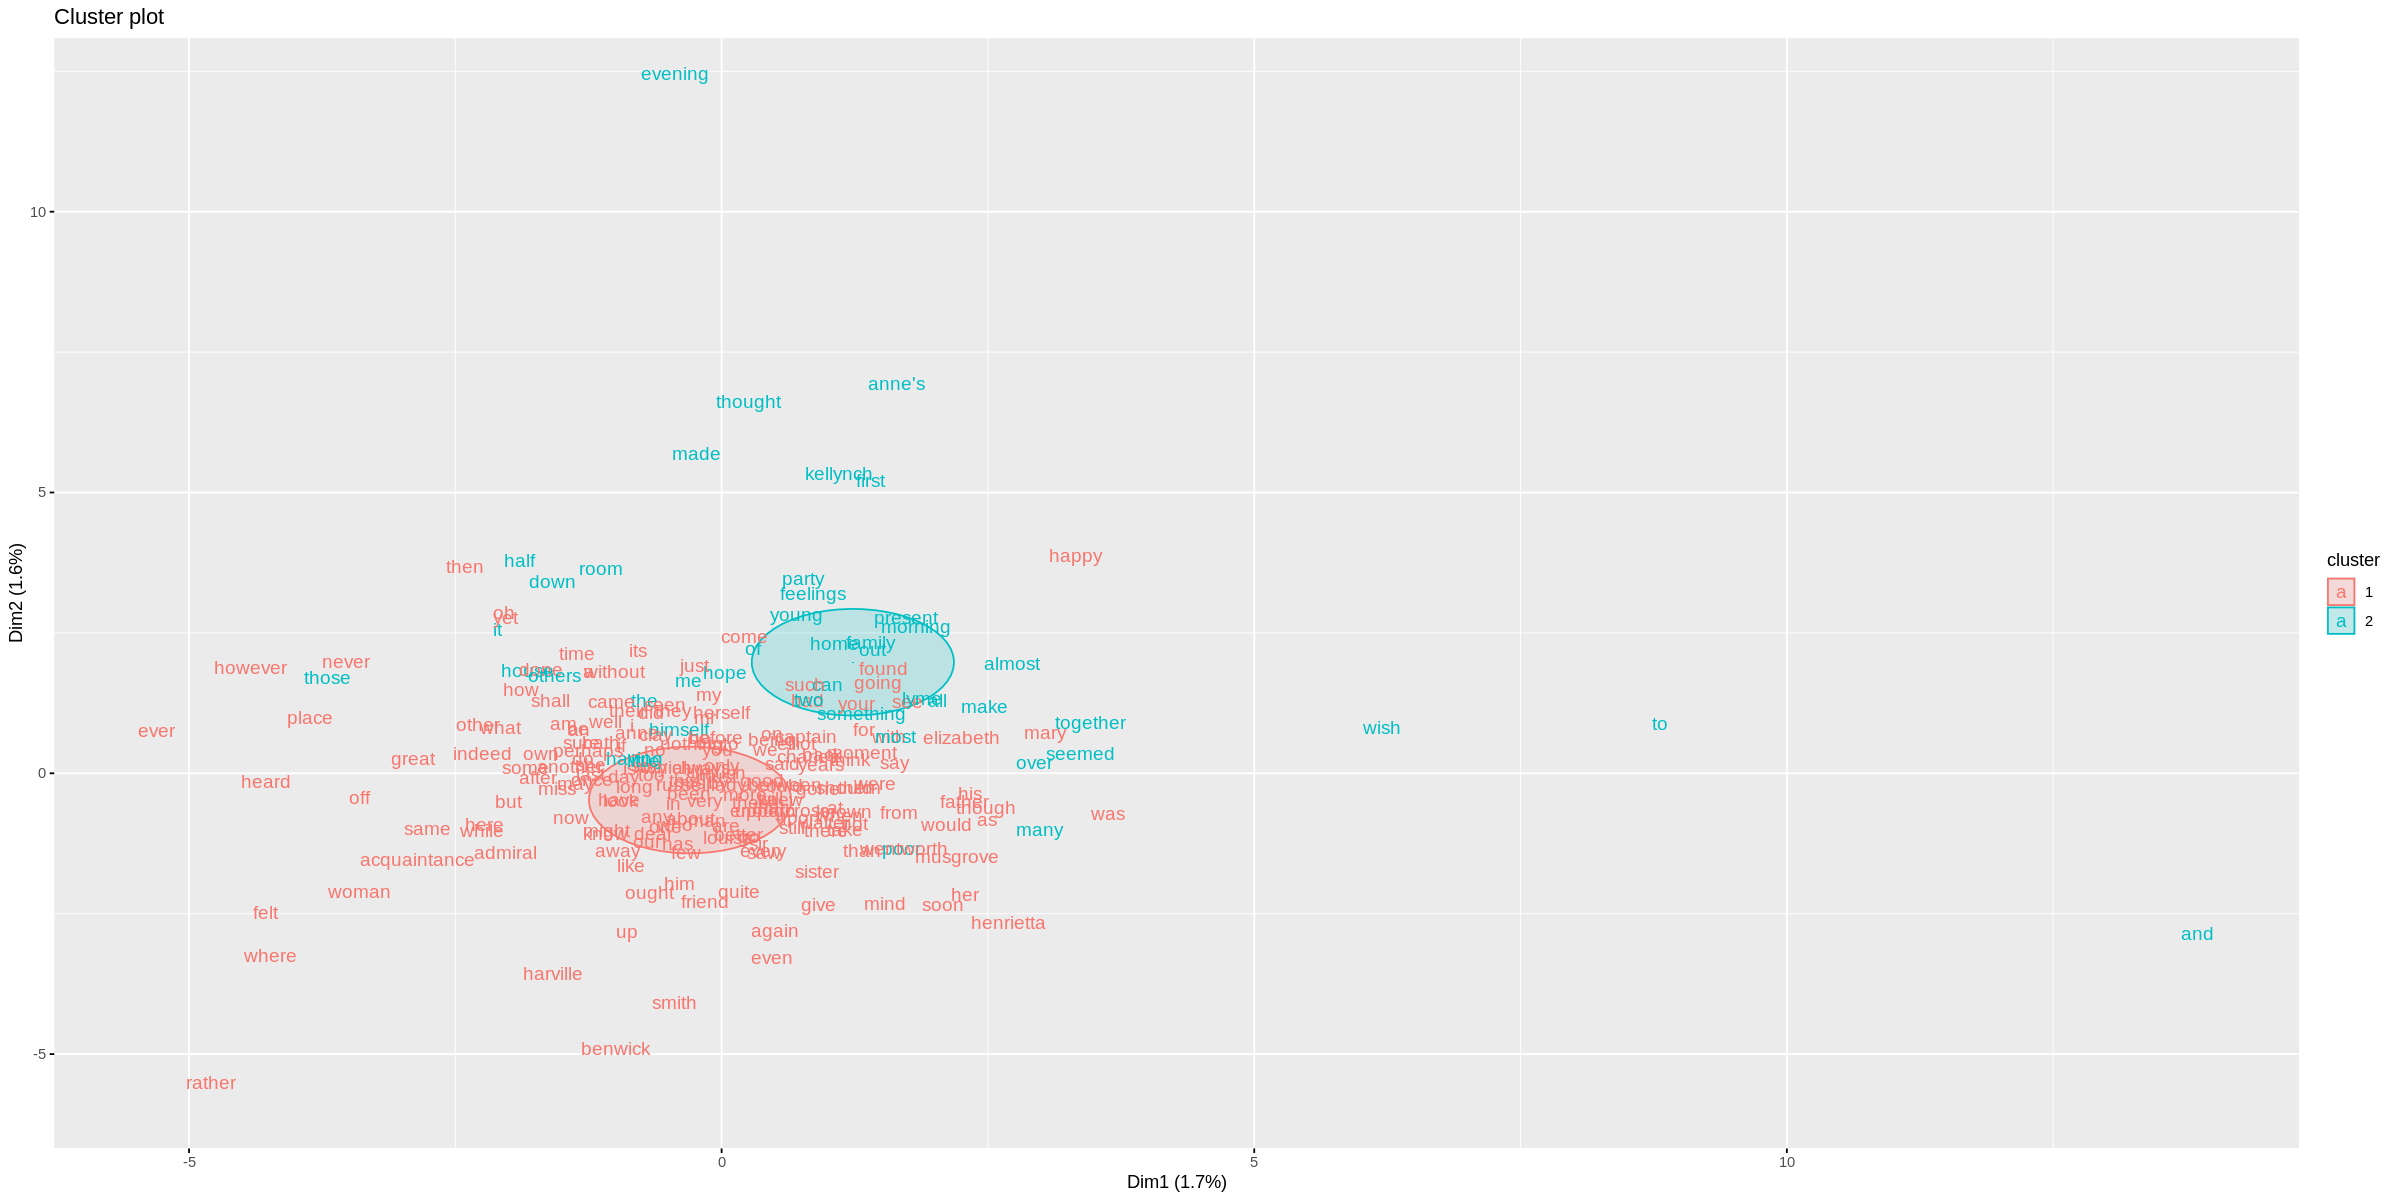

In [38]:
options(repr.plot.width = 20, repr.plot.height = 10) # a wider, shorter figure
nbc = kmeans(cos_emb, 2)
fviz_cluster(nbc, data = cos_emb, geom = c("text"), ellipse.type = "euclid")

PMI :

J’ai appliqué le même exemple que dans le livre SMLTAR (understand word embeddings by finding them yourself) mais avec le même livre par chapitre que pour le TF-IDF. Dans cet exemple, les stopword et stemming ne sont pas appliqué cependant.

•	Sliding window de 4 mots pour associer le PMI entre 2 mots.

•	Factorisation avec SVD pour avoir une matrice de dimension de 100 pour chaque mot.

Si je regarde les mots similaires pour friend selon la mesure cosine similarity, je trouve les mots father, sister, feelings & dear qui me semble cohérent. Les scores ne sont pas très élevés cependant. Un texte plus étendu aiderait sans doute à amplifier ce score.

Au mieux, je suis capable de séparer par 2 clusters les mots similaire du livre.


GloVe: need more ram in Google colab !

In [31]:
install.packages("textdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(textdata)
interactive() # this is NOT an interactive R GUI so we cannot answer "Do you want to download" dialogues
tns <- getNamespace("textdata") # so, unless we run this on a local machine, we need to do more steps
assignInNamespace(x = "printer", value = function(...) 1, ns = tns) # a workaround from https://community.rstudio.com/t/is-there-a-way-to-make-the-choices-asked-for-in-the-package-always-yes/105442


[1] FALSE

In [34]:
glove6b <- read.delim('/content/glove.6B.100d.txt',sep = " ",header=0)
colnames(glove6b)[1]='token'
head(glove6b)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


,token,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,the,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.57545,⋯,0.016215,-0.017099,-0.389840,0.87424,-0.72569,-0.51058,-0.520280,-0.14590,0.82780,0.270620
2,",",-0.107670,0.110530,0.598120,-0.543610,0.673960,0.106630,0.038867,0.354810,0.06351,⋯,0.349510,-0.722600,0.375490,0.44410,-0.99059,0.61214,-0.351110,-0.83155,0.45293,0.082577
3,.,-0.339790,0.209410,0.463480,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.46619,⋯,-0.063351,-0.674120,-0.068895,0.53604,-0.87773,0.31802,-0.392420,-0.23394,0.47298,-0.028803
4,of,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.35810,⋯,0.187120,-0.018488,-0.267570,0.72700,-0.59363,-0.34839,-0.560940,-0.59100,1.00390,0.206640
5,to,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.20135,⋯,-0.131340,0.058617,-0.318690,-0.61419,-0.62393,-0.41548,-0.038175,-0.39804,0.47647,-0.159830
6,and,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.329430,0.183640,-0.18057,⋯,0.014487,-0.625900,-0.323670,0.41862,-1.08070,0.46742,-0.499310,-0.71895,0.86894,0.195390


In [35]:
tidy_glove <- glove6b %>%
  pivot_longer(contains("V"),
               names_to = "dimension") %>%
  rename(item1 = token)

head(tidy_glove)

item1,dimension,value
<chr>,<chr>,<dbl>
the,V2,-0.038194
the,V3,-0.244870
the,V4,0.728120
the,V5,-0.399610
the,V6,0.083172
the,V7,0.043953


In [36]:
nearest_neighbors <- function(df, token) {
  df %>%
    widely(
      ~ {
        y <- .[rep(token, nrow(.)), ]
        res <- rowSums(. * y) / 
          (sqrt(rowSums(. ^ 2)) * sqrt(sum(.[token, ] ^ 2)))
        matrix(res, ncol = 1, dimnames = list(x = names(res)))
      },
      sort = TRUE,
      maximum_size = NULL
    )(item1, dimension, value) %>%
    select(-item2)
}

In [ ]:
head(tidy_glove %>%
  nearest_neighbors("friend"),5)

In [ ]:
word_matrix <- tidy_chapter %>%
  inner_join(by = "word",
             tidy_glove %>%
               distinct(item1) %>%
               rename(word = item1)) %>%
  count(chapter, word) %>%
  cast_sparse(chapter, word, n)

glove_matrix <- tidy_glove %>%
  inner_join(by = "item1",
             tidy_chapter %>%
               distinct(word) %>%
               rename(item1 = word)) %>%
  cast_sparse(item1, dimension, value)

doc_matrix <- word_matrix %*% glove_matrix

dim(doc_matrix)

J’ai essayé d’appliquer le même exemple que le livre en téléchargeant glove.6B.100d.txt. Malheureusement, je manque de RAM sur google colab pour effectuer les mêmes calculs pour les mots similaire à friend et pour ma matrice. À tester sur un environnement local peut-être.

Word2Vec:

In [39]:
install.packages("word2vec") # https://cran.r-project.org/web/packages/word2vec/word2vec.pdf
library(word2vec)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppProgress’




In [40]:
model <- word2vec(x = book_words$text, type = "skip-gram", dim = 100, window = 4L, stopwords = stopwords()) 

In [41]:
emb <- as.matrix(model)
dim(emb)

[1] 1563  100

In [185]:
# https://rdrr.io/cran/word2vec/man/word2vec_similarity.html

x <- emb[c("friend"), ]
y <- emb
#word2vec_similarity(x, x)
#word2vec_similarity(x, y, top_n = 5)
predict(model, x, type = "nearest", top_n = 5)

term,similarity,rank
<chr>,<dbl>,<int>
sisters,0.9982017,1
truth,0.9981265,2
staying,0.9980298,3
opinion,0.9979810,4
either,0.9979619,5


In [42]:
s1 <- cosSparse(t(emb))

Too few points to calculate an ellipse



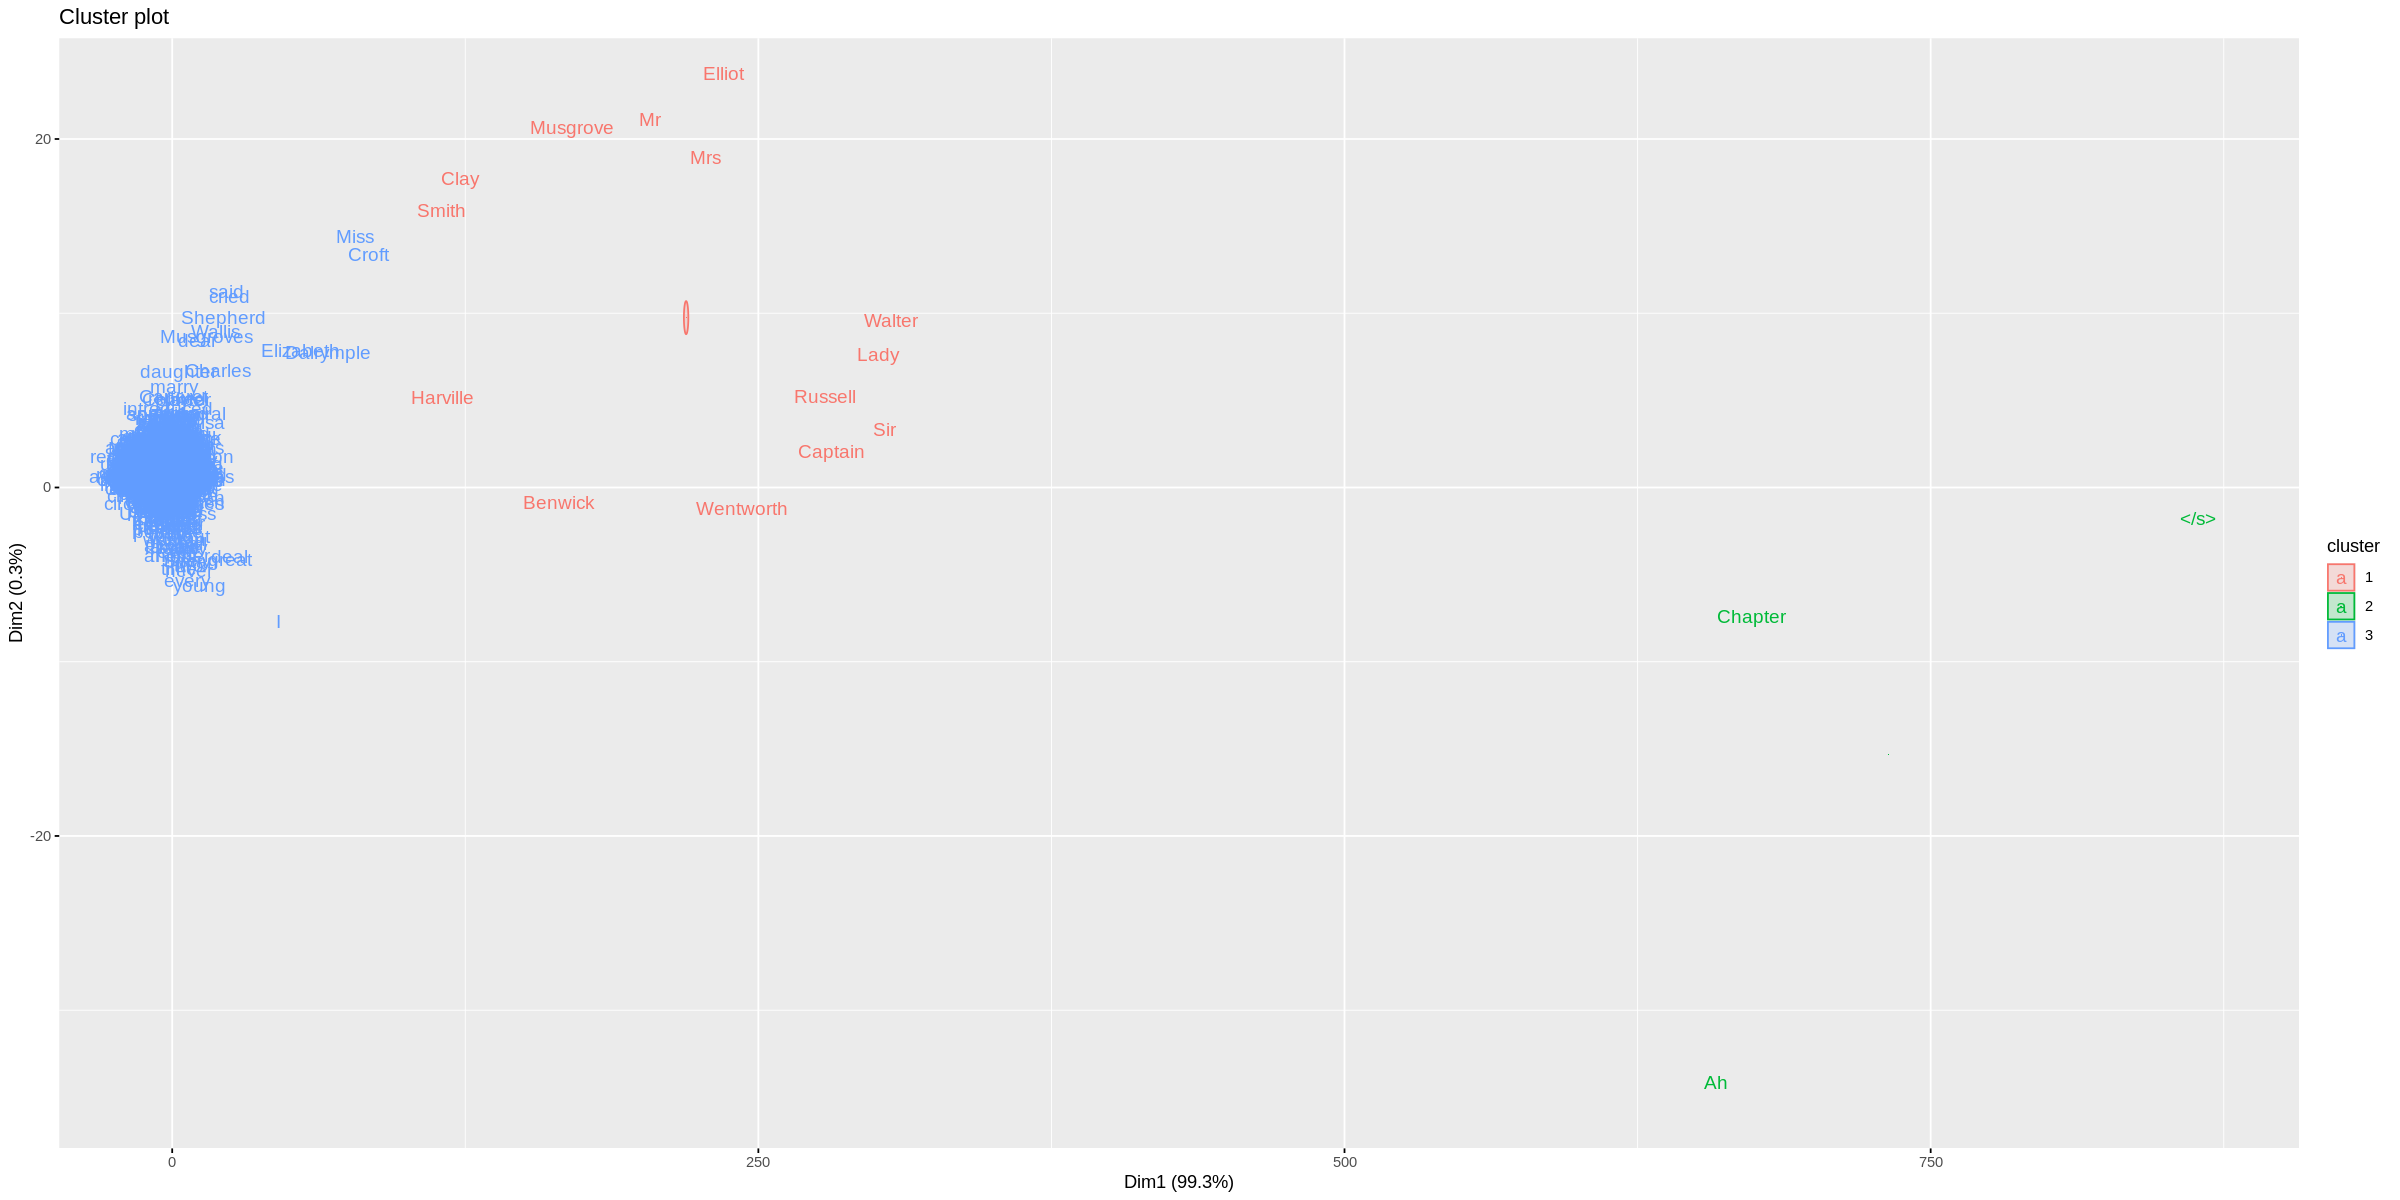

In [48]:
options(repr.plot.width = 20, repr.plot.height = 10) # a wider, shorter figure
nbc = kmeans(s1, 3)
fviz_cluster(nbc, data = s1, geom = c("text"), ellipse.type = "euclid")

En utilisant le livre au complet sur une fenêtre de 4 mots, pour une dimension de 100 et en retirant les stop word, je peux déterminer les mots les plus similaire à friend comme pour l’exercice du PMI. Les mots sisters (comme pour PMI), truth, staying, opinion & either sont données et sembles cohérent avec cette fois-ci un scrore nettement plus élevé.

J’ai séparé par 3 clusters les mots similaires du livre. 
